# ETL

In [1]:
# install required packages
#pip install pandas numpy matplotlib seaborn plotly scikit-learn

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

preview

In [3]:
bank = pd.read_csv('./Data/BankChurners.csv')
bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

From the columns we may want to keep client number for iteration and the comp[any will want to know which customers to target, but we don't need the bayes classifier columns

In [4]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
# drop last 2 columns
bank_cleaner = bank.copy().drop(columns=bank.columns[-2:])
# columns to analyse
columns = bank.columns[1:-2]
columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Plotting distributions for insight

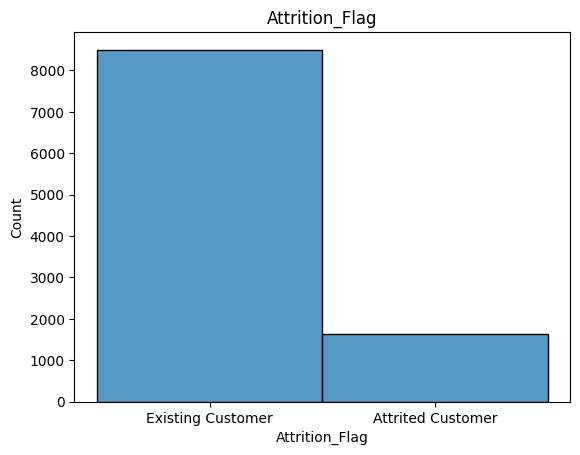

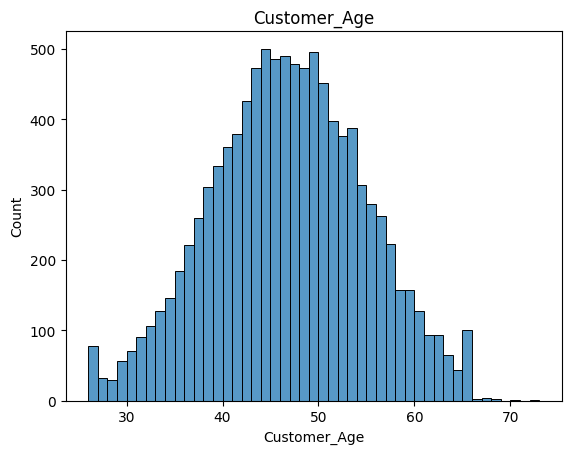

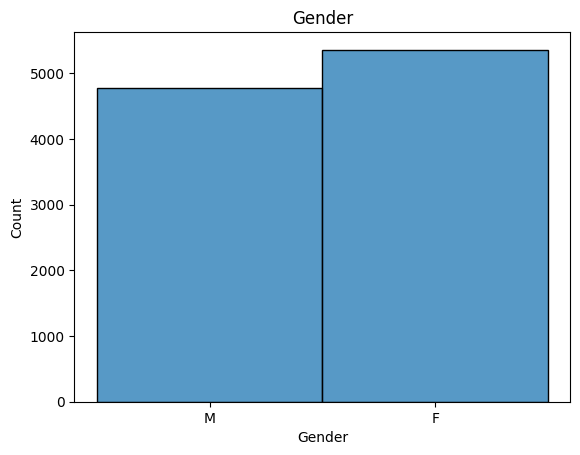

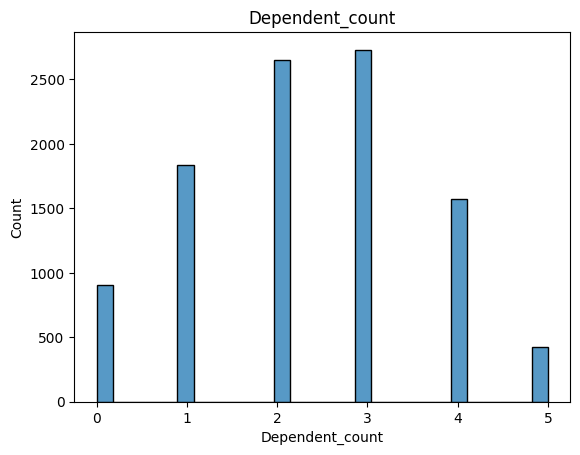

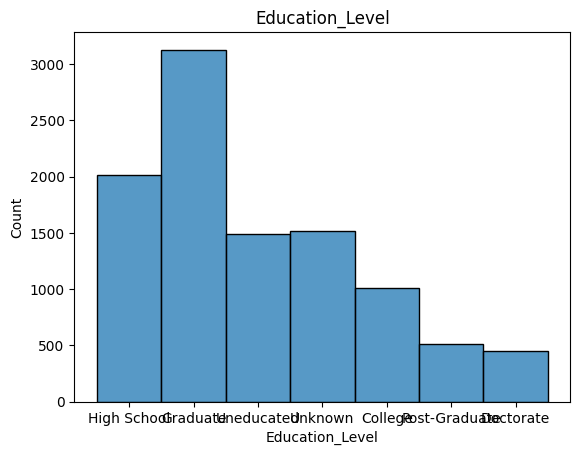

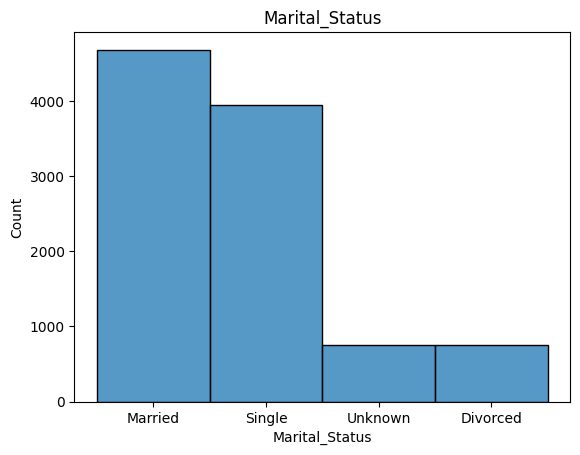

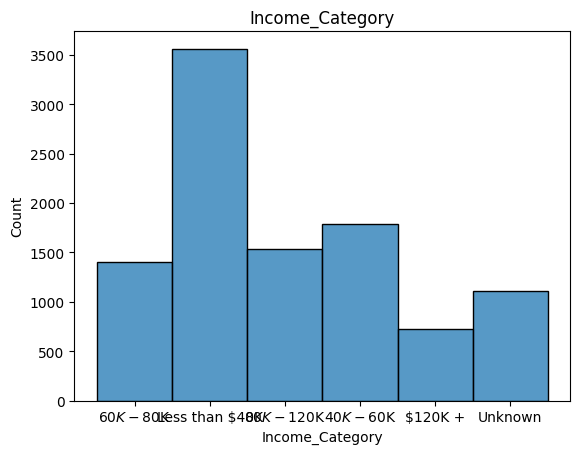

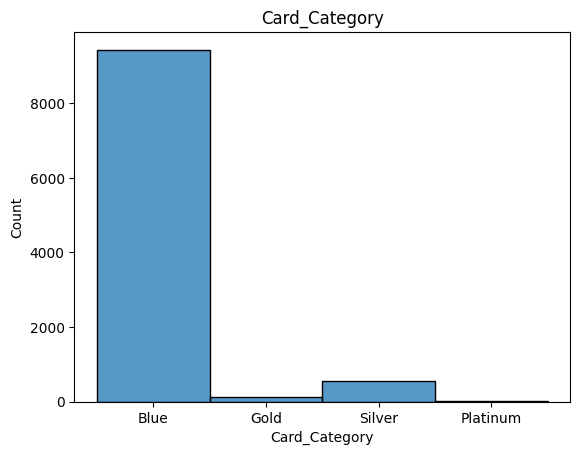

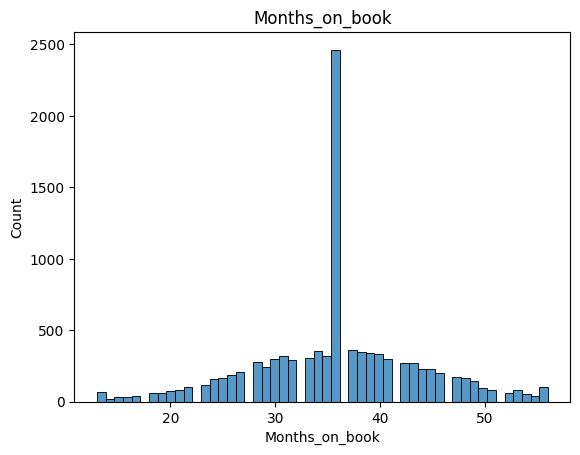

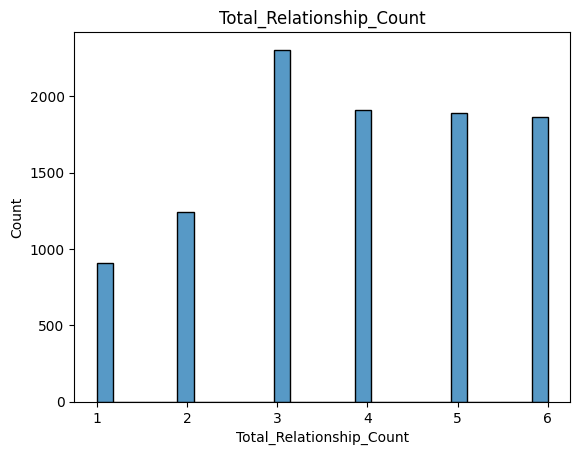

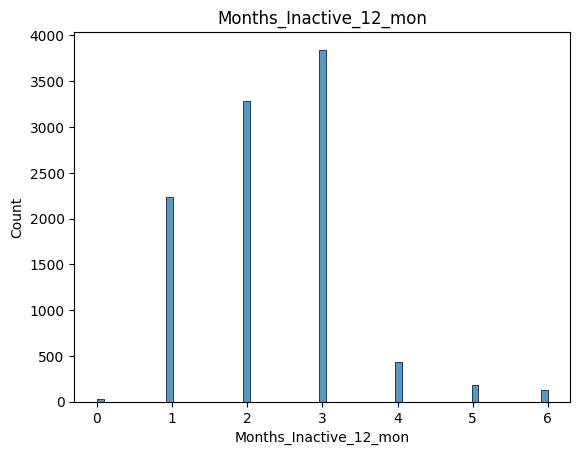

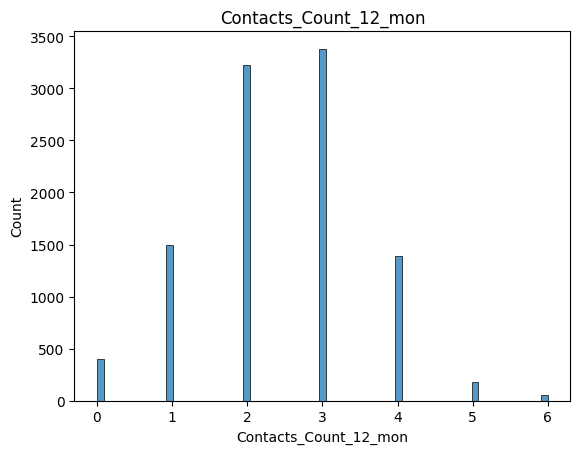

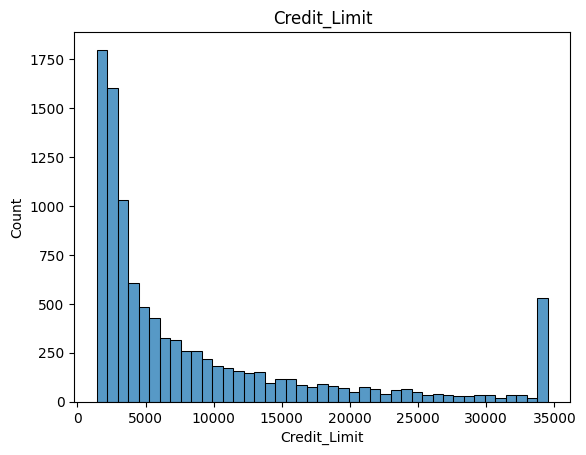

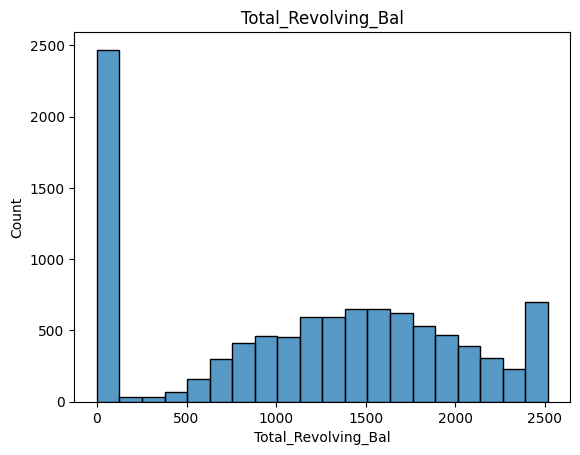

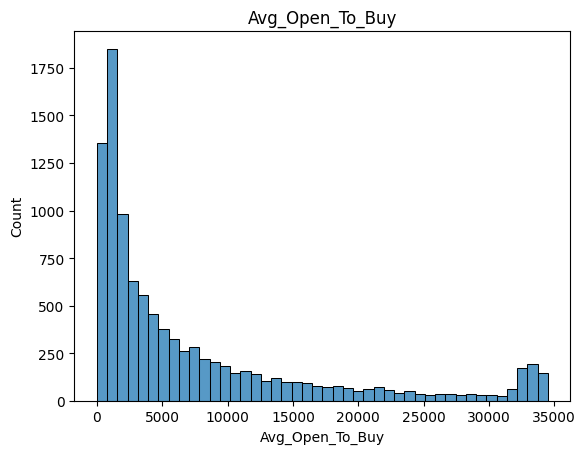

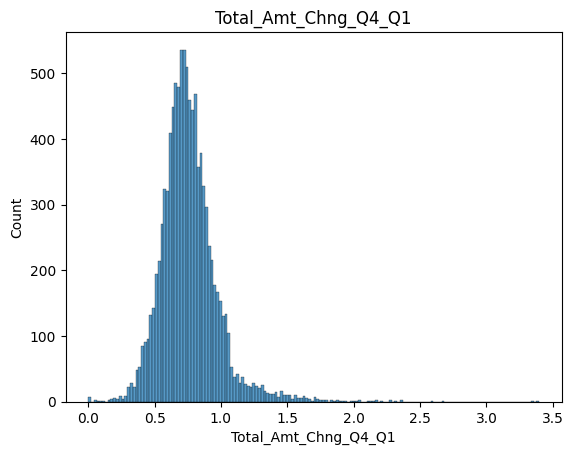

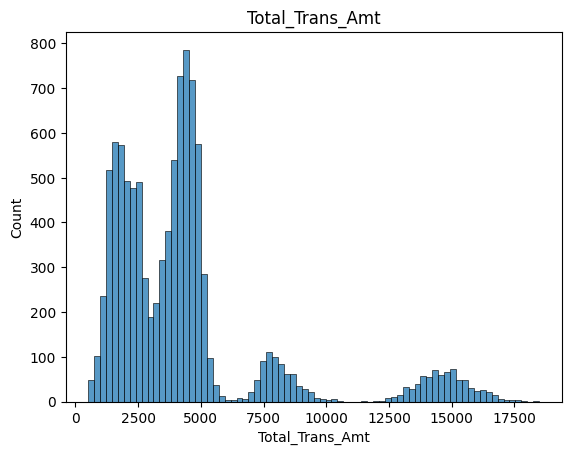

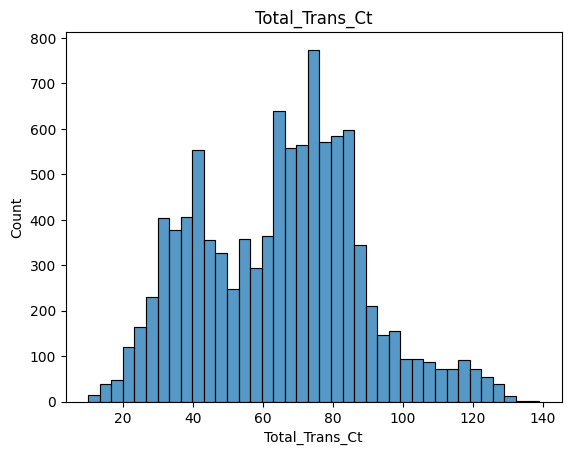

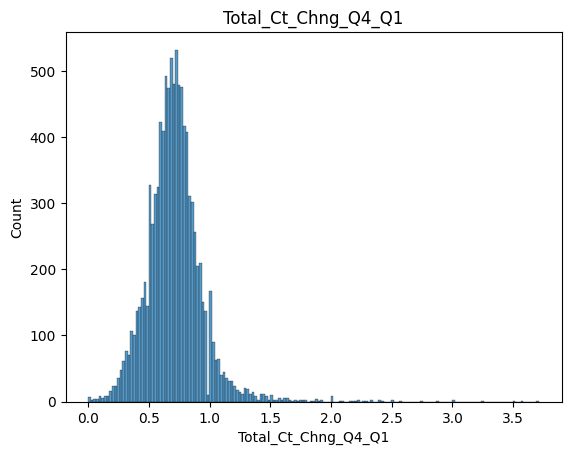

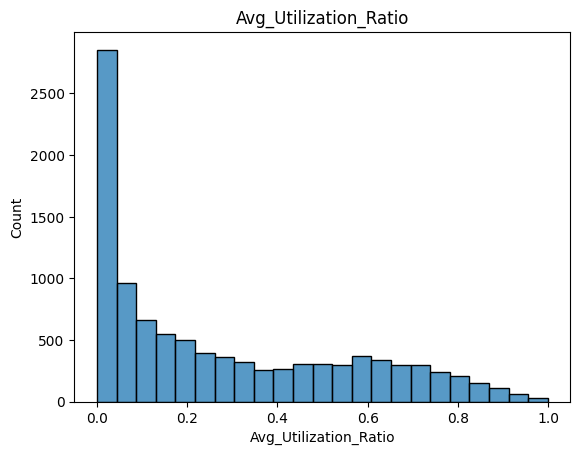

In [6]:
for column in columns:
    sns.histplot(bank[column])
    plt.title(column)
    plt.show()
    '''
    print(f'Counts for {column}')
    for value in bank[column].unique():
        print(f'{value}: {bank[bank[column] == value].shape[0]}')
    print()
    '''

inspecting column dtypes

In [7]:
bank_cleaner.dtypes[1:]

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

storing the object and nnumeric columns, respectively

In [8]:
object_columns = bank[columns].select_dtypes(include='object')

In [9]:
# first column is a unique key and so should be excluded
numeric_columns = bank[columns[1:]].select_dtypes(exclude='object')

describing the statistical properties of the numerical features

In [10]:
for numeric_column in numeric_columns:
    print(f'Statistics for {numeric_column} feature\n{bank[numeric_column].describe()}\n')

Statistics for Customer_Age feature
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

Statistics for Dependent_count feature
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

Statistics for Months_on_book feature
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

Statistics for Total_Relationship_Count feature
count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationsh

checking for outliers may reveal something useful

In [11]:
for column in numeric_columns:
    # terms for formula
    data = bank_cleaner[column]
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3 # factor for std
    # formula for z-score test
    z_scores = [(x - mean) / std for x in data]
    outliers = [x for i, x in enumerate(data) if abs(z_scores[i]) > threshold]
    print(f'Outliers in {column}: {outliers}')

Outliers in Customer_Age: [73]
Outliers in Dependent_count: []
Outliers in Months_on_book: []
Outliers in Total_Relationship_Count: []
Outliers in Months_Inactive_12_mon: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Outliers in Contacts_Count_12_mon: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Outliers in Credit_Limit: []
Outliers in Total_Revolving_Bal: []
Outliers in Avg_Open_To_Buy: []
Outliers in Total_Amt_Chng_Q4_Q1: [1.541, 2.594, 2.175, 1.975, 2.204, 3.355, 1.524, 1.433, 3.397, 1.707, 1.708, 1.831, 1.608, 1.726, 1.75, 1.724, 1.449, 1.621, 2

no features are 'missing' values

In [12]:
print(bank_cleaner.isna().any().any())

False


There are `Unknown` values which are analogous to `na`

In [13]:
for feature in object_columns:
    counts = dict()
    unique_features = bank_cleaner[feature].unique()
    for value in unique_features:
        counts[value] = bank_cleaner[bank_cleaner[feature] == value].shape[0]
    print(f'The unique value counts for the {feature} feature are: {counts}\n')

The unique value counts for the Attrition_Flag feature are: {'Existing Customer': 8500, 'Attrited Customer': 1627}

The unique value counts for the Gender feature are: {'M': 4769, 'F': 5358}

The unique value counts for the Education_Level feature are: {'High School': 2013, 'Graduate': 3128, 'Uneducated': 1487, 'Unknown': 1519, 'College': 1013, 'Post-Graduate': 516, 'Doctorate': 451}

The unique value counts for the Marital_Status feature are: {'Married': 4687, 'Single': 3943, 'Unknown': 749, 'Divorced': 748}

The unique value counts for the Income_Category feature are: {'$60K - $80K': 1402, 'Less than $40K': 3561, '$80K - $120K': 1535, '$40K - $60K': 1790, '$120K +': 727, 'Unknown': 1112}

The unique value counts for the Card_Category feature are: {'Blue': 9436, 'Gold': 116, 'Silver': 555, 'Platinum': 20}



a list of features with `Unknown` values

In [14]:
unknown_features = [feature for feature in object_columns if 'Unknown' in bank_cleaner[feature].unique()]

replace `Unknown` values with the mode of its corrsponding feature for basic imputation of 'missing' values. Some ideas for a more comprehsive approach would be to impute the mode of a subset that are most similar in other features using pairwise comparison.

In [15]:
for feature in unknown_features:
    mode = bank_cleaner[feature].mode()[0]
    bank_cleaner[feature].replace('Unknown', mode, inplace=True)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24368\2626267233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_cleaner[feature].replace('Unknown', mode, inplace=True)


the mode of the 3 features we imputed have absorbed the `Unknown` values

In [16]:
for feature in object_columns:
    counts = dict()
    unique_features = bank_cleaner[feature].unique()
    for value in unique_features:
        counts[value] = bank[bank[feature] == value].shape[0]
    print(f'The unique value counts for the {feature} feature are: {counts}\n')

The unique value counts for the Attrition_Flag feature are: {'Existing Customer': 8500, 'Attrited Customer': 1627}

The unique value counts for the Gender feature are: {'M': 4769, 'F': 5358}

The unique value counts for the Education_Level feature are: {'High School': 2013, 'Graduate': 3128, 'Uneducated': 1487, 'College': 1013, 'Post-Graduate': 516, 'Doctorate': 451}

The unique value counts for the Marital_Status feature are: {'Married': 4687, 'Single': 3943, 'Divorced': 748}

The unique value counts for the Income_Category feature are: {'$60K - $80K': 1402, 'Less than $40K': 3561, '$80K - $120K': 1535, '$40K - $60K': 1790, '$120K +': 727}

The unique value counts for the Card_Category feature are: {'Blue': 9436, 'Gold': 116, 'Silver': 555, 'Platinum': 20}



# feature eengineering

from kaggle learn: itermediate machine learning: pipelines

In [18]:


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)



In [19]:


from sklearn.metrics import mean_absolute_error

# Visualisation

Pair plot shows correlations between features

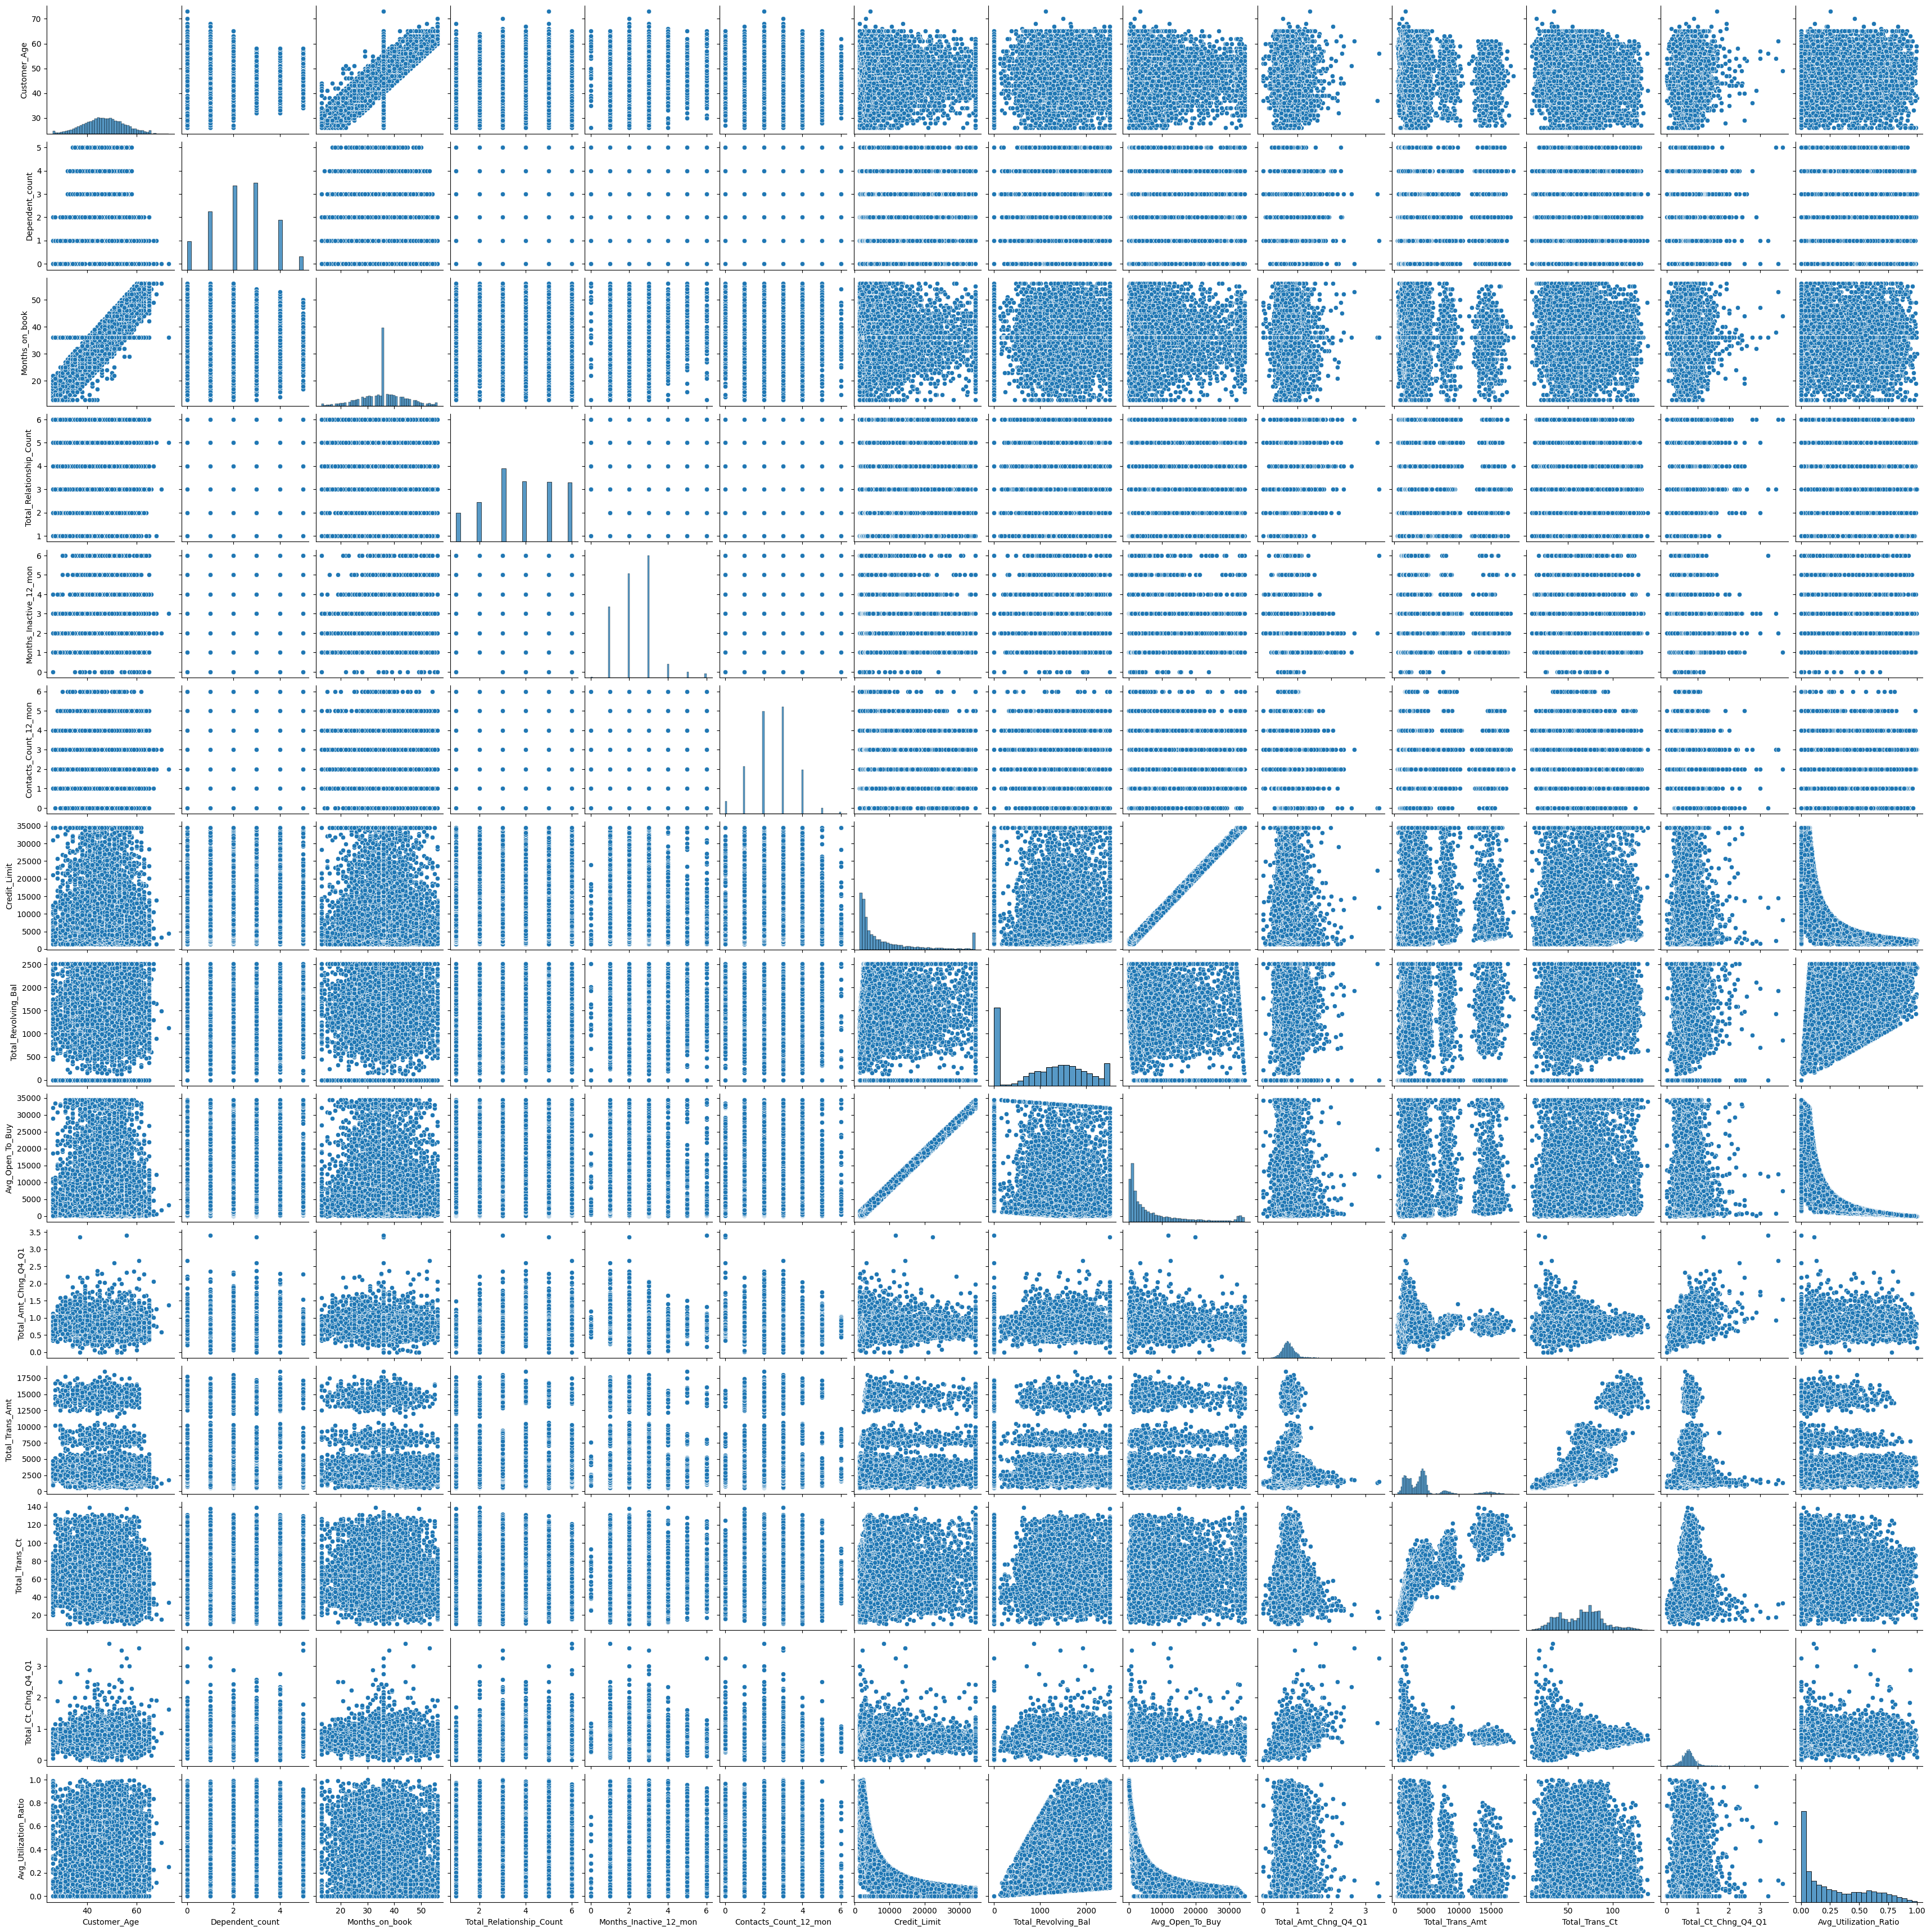

In [21]:
sns.pairplot(bank_cleaner[numeric_columns.columns]);

From Copilot Boxplots show similar distributions of `Months_on_book` for `Attrition_flag`

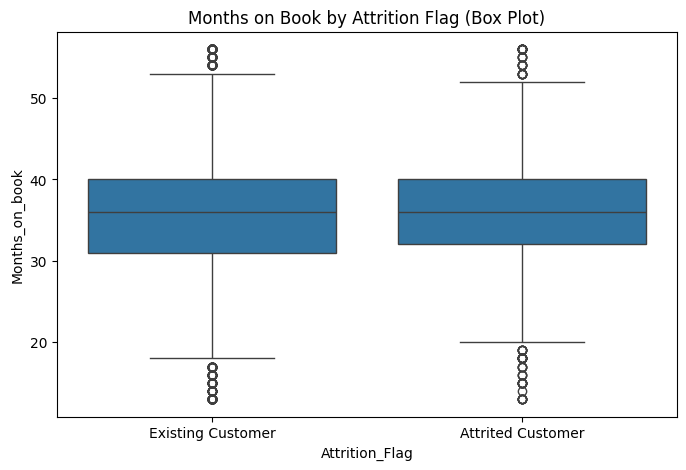

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=bank_cleaner, x='Attrition_Flag', y='Months_on_book')
plt.title('Months on Book by Attrition Flag (Box Plot)')
plt.show()

Using copilot to create a stacked bar chart for income and card type.

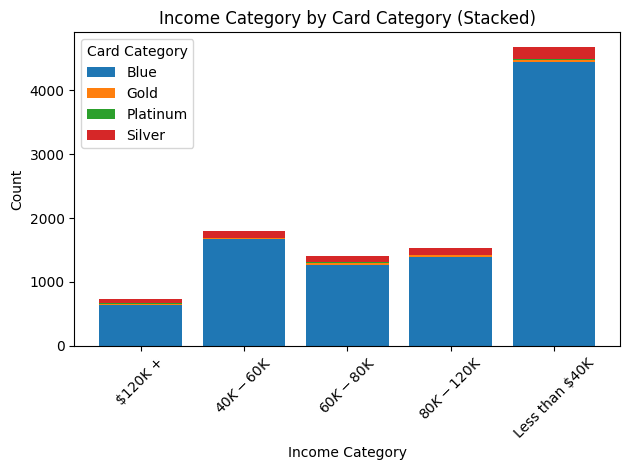

In [35]:
# Prepare the data
grouped = bank_cleaner.groupby(['Income_Category', 'Card_Category']).size().unstack(fill_value=0)

# Get income categories and card categories
income_categories = grouped.index
card_categories = grouped.columns

# Plot stacked bars
bottom = np.zeros(len(income_categories))
for card in card_categories:
    plt.bar(income_categories, grouped[card], bottom=bottom, label=card)
    bottom += grouped[card].values

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Income Category by Card Category (Stacked)')
plt.xticks(rotation=45)
plt.legend(title='Card Category')
plt.tight_layout()
plt.show()